In [34]:
# import required modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from joblib import load

In [35]:
# Loaded cleaned DataFrame
loaded_df = load('cleaned_dataframe.joblib')

In [36]:
loaded_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 749947 entries, 0 to 749999
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Podcast_Name            749947 non-null  object 
 1   Episode_Length_minutes  662860 non-null  float64
 2   Genre                   749947 non-null  object 
 3   Publication_Day         749947 non-null  object 
 4   Publication_Time        749947 non-null  object 
 5   Number_of_Ads           749947 non-null  float64
 6   Episode_Sentiment       749947 non-null  object 
 7   Listening_Time_minutes  749947 non-null  float64
dtypes: float64(3), object(5)
memory usage: 51.5+ MB


In [37]:
# Replacing Podcast_Name with Top_Podcast
top_10_podcasts = loaded_df['Podcast_Name'].value_counts().head(10).index.tolist()
loaded_df['Top_Podcast'] = loaded_df['Podcast_Name'].apply(lambda x: 1.0 if x in top_10_podcasts else 0.0)
loaded_df = loaded_df.drop(columns=['Podcast_Name'])


DataFrame info after encoding:
<class 'pandas.core.frame.DataFrame'>
Index: 749947 entries, 0 to 749999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Episode_Length_minutes      662860 non-null  float64
 1   Number_of_Ads               749947 non-null  float64
 2   Listening_Time_minutes      749947 non-null  float64
 3   Top_Podcast                 749947 non-null  float64
 4   Genre_Business              749947 non-null  bool   
 5   Genre_Comedy                749947 non-null  bool   
 6   Genre_Education             749947 non-null  bool   
 7   Genre_Health                749947 non-null  bool   
 8   Genre_Lifestyle             749947 non-null  bool   
 9   Genre_Music                 749947 non-null  bool   
 10  Genre_News                  749947 non-null  bool   
 11  Genre_Sports                749947 non-null  bool   
 12  Genre_Technology            749947 non-null  

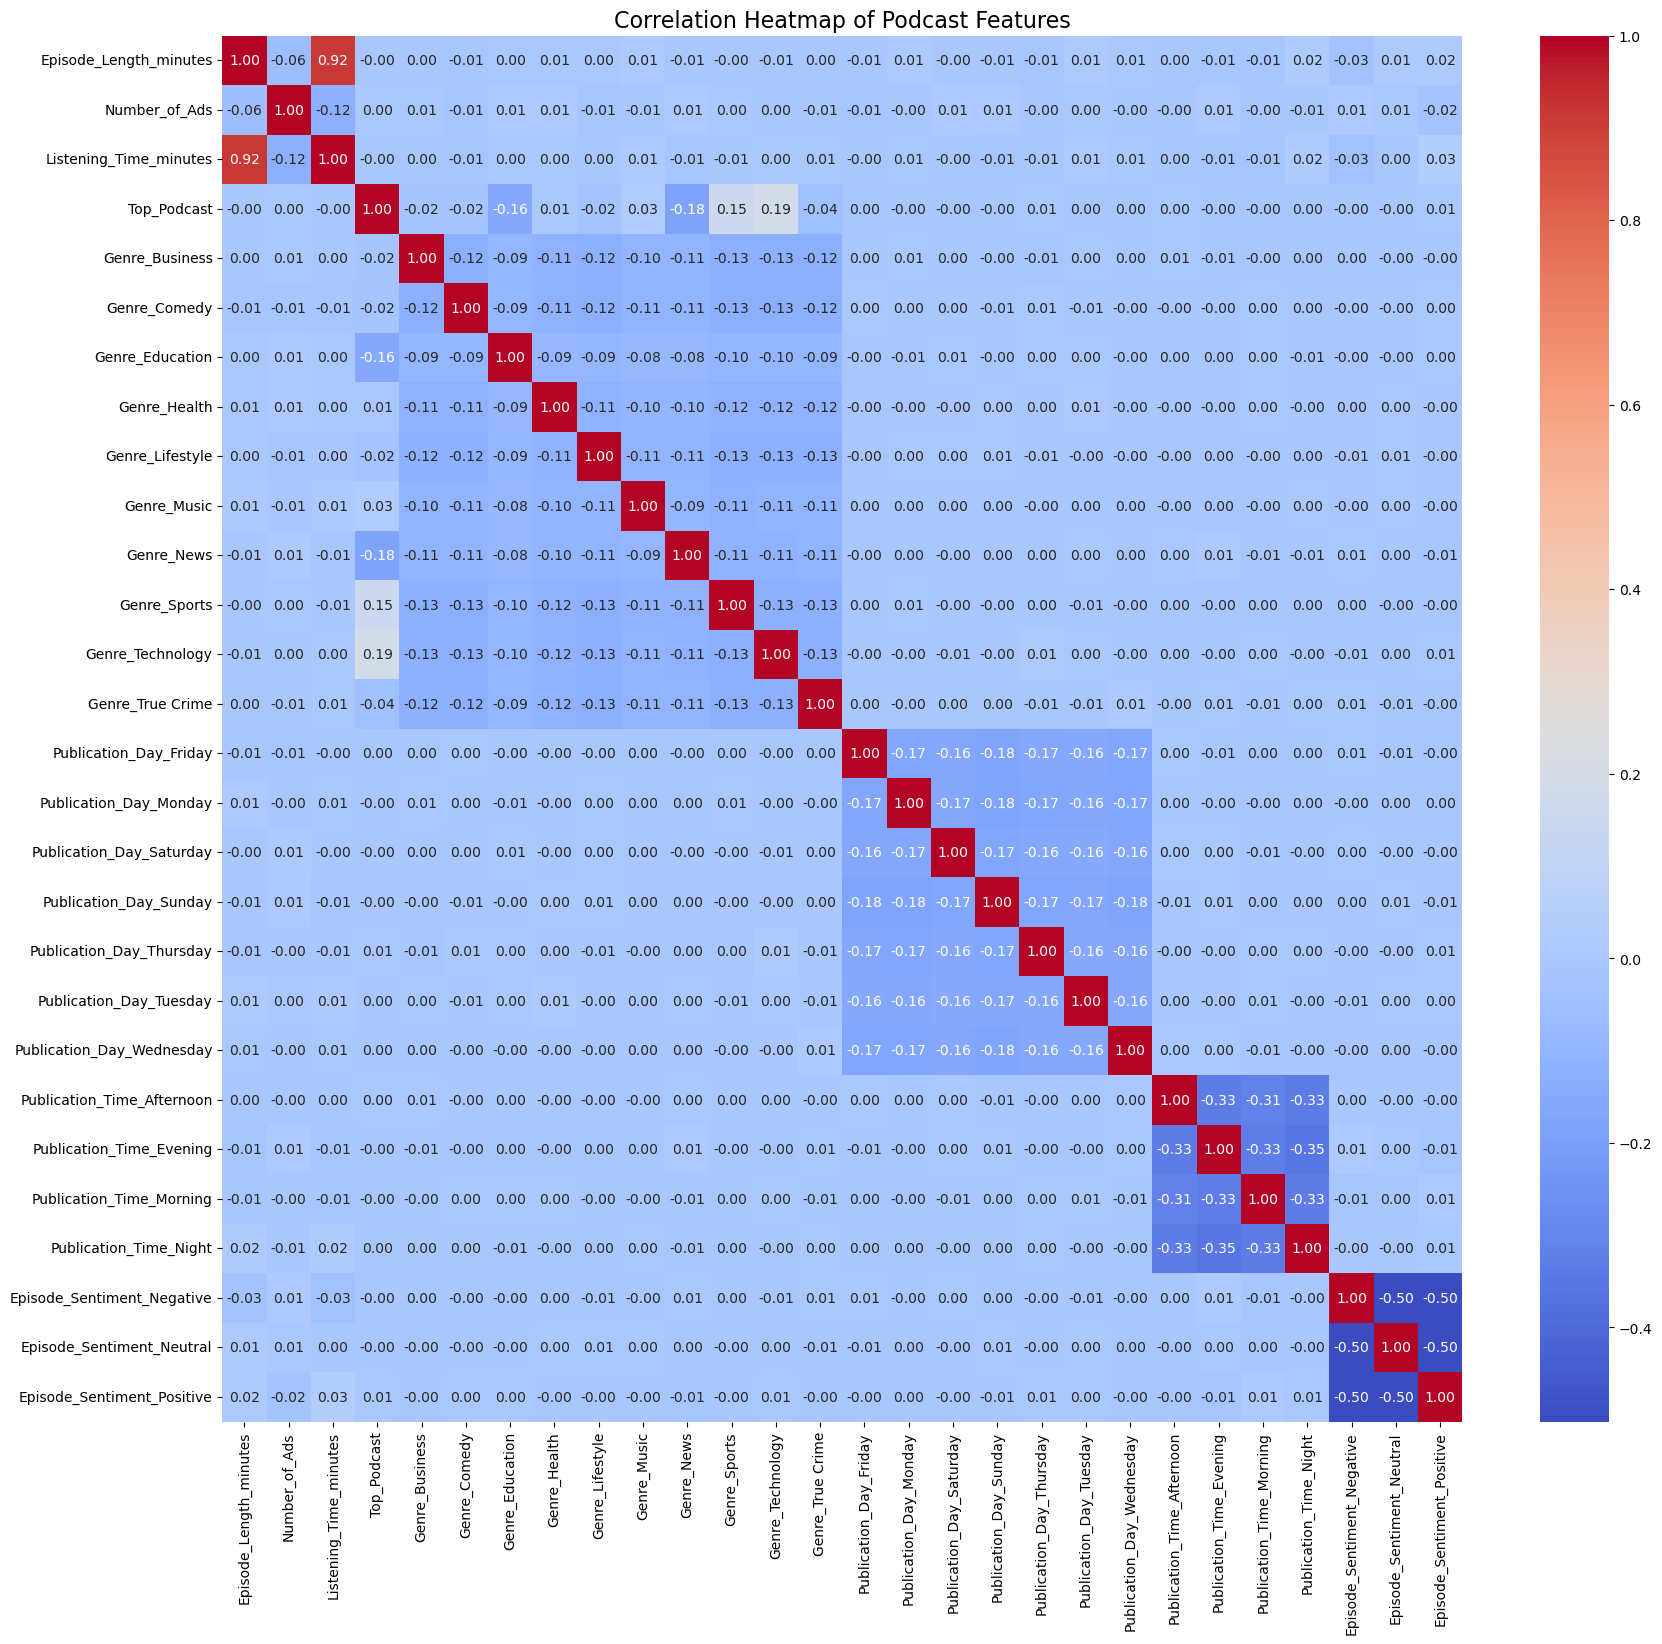

In [40]:
# Convert Categorical Columns to Numerical using One-Hot Encoding
categorical_cols = ['Genre', 'Publication_Day', 'Publication_Time', 'Episode_Sentiment']
df_encoded = pd.get_dummies(loaded_df, columns=categorical_cols, prefix=categorical_cols, dummy_na=False)

print("\nDataFrame info after encoding:")
df_encoded.info()
print("\nFirst 5 rows of encoded DataFrame:")
print(df_encoded.head())

# Step 3: Create the Correlation Matrix
correlation_matrix = df_encoded.corr()

# Step 4: Visualize the Heatmap
plt.figure(figsize=(20, 18)) # Adjust size as needed, it will be large
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # annot=True can be very crowded for large matrices
plt.title('Correlation Heatmap of Podcast Features', fontsize=16)
plt.show()